Fitting linear regression model by calculating coefficients via Normal equations.Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. We can directly find out the value of θ without using Gradient Descent.

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('nba_data.csv')

In [126]:
df.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0


In [138]:
X=np.array(df['playHeight'])
Z=np.ones((X.shape[0],2))
Z[:,1]=X
Z=np.matrix(Z)
y=np.array(df['playWeight'])

In [139]:
Z.shape

(155713, 2)

We want to fit a straight line between the Player Height and Player Weight by solving normal equations θ = (X.T*X)^−1 *XT *y

In [141]:
P=np.dot(Z.transpose(),Z)

In [142]:
Q = np.linalg.inv(P)

In [143]:
R=np.dot(Q,Z.transpose())

In [144]:
T=np.dot(R,y)

In [153]:
T

matrix([[-260.98038222,    6.06170167]])

In [157]:
a=T[0,0]
b=T[0,1]

def linefn(g):
    return float(a)+float(b)*g

x=np.array([i for i in range(70,100)]).reshape(-1,1)
u=np.array([linefn(i) for i in range(70,100)])

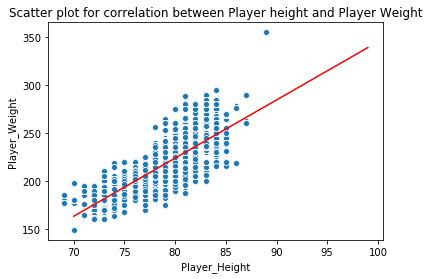

In [158]:
sns.scatterplot(df.playHeight,df.playWeight)
plt.xlabel('Player_Height')
plt.ylabel('Player_Weight')
plt.title('Scatter plot for correlation between Player height and Player Weight')
plt.plot(x,u,color='red')
plt.show()